In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from config import geoapify_key

# Import plot namespaces
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
# Import Alzheimer data file as DataFrame
alzheimer_pd = pd.read_csv("Resources/alzheimers_prediction_dataset.csv")
alzheimer_pd.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [38]:
# Get count of Alzheimer incidents per country
grouped_summary_df = alzheimer_pd.groupby("Country").size().reset_index(name="Incident Count")
grouped_summary_df


,Country,Incident Count
0,Argentina,3731
1,Australia,3787
2,Brazil,3839
3,Canada,3711
4,China,3592
5,France,3710
6,Germany,3807
7,India,3741
8,Italy,3724
9,Japan,3751


In [39]:
# Get the toal number of countries in research dataset
number_of_countries = len(grouped_summary_df)
number_of_countries

20

In [40]:
# Sort grouped dataframe by number of incidents
grouped_summary_df = grouped_summary_df.sort_values(by="Incident Count", ascending=True)
grouped_summary_df

,Country,Incident Count
4,China,3592
10,Mexico,3598
19,USA,3616
18,UK,3651
13,Saudi Arabia,3662
17,Sweden,3689
16,Spain,3698
11,Norway,3706
5,France,3710
3,Canada,3711


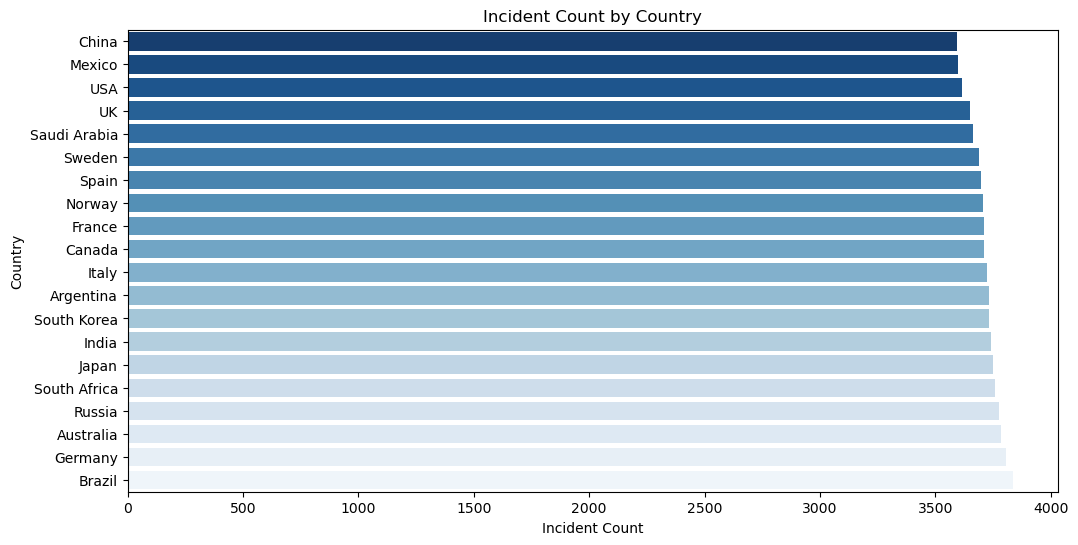

In [41]:
# Plot the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(x="Incident Count", y="Country", data=grouped_summary_df, palette="Blues_r")
# sns.barplot(x="Country", y="Incident Count", data=grouped_summary_df, palette="Blues_r")

# Add labels and title

plt.xlabel("Incident Count")
plt.ylabel("Country")
plt.title("Incident Count by Country")

# plt.xlabel("Country")
# plt.ylabel("Incident Count")
# plt.title("Incident Count by Country")

# Show the plot
plt.show()

In [49]:
grouped_by_gender_df = alzheimer_pd.groupby(["Country", "Gender"]).size().reset_index(name="Incident Count")
grouped_by_gender_df

,Country,Gender,Incident Count
0,Argentina,Female,1844
1,Argentina,Male,1887
2,Australia,Female,1888
3,Australia,Male,1899
4,Brazil,Female,1888
5,Brazil,Male,1951
6,Canada,Female,1871
7,Canada,Male,1840
8,China,Female,1789
9,China,Male,1803


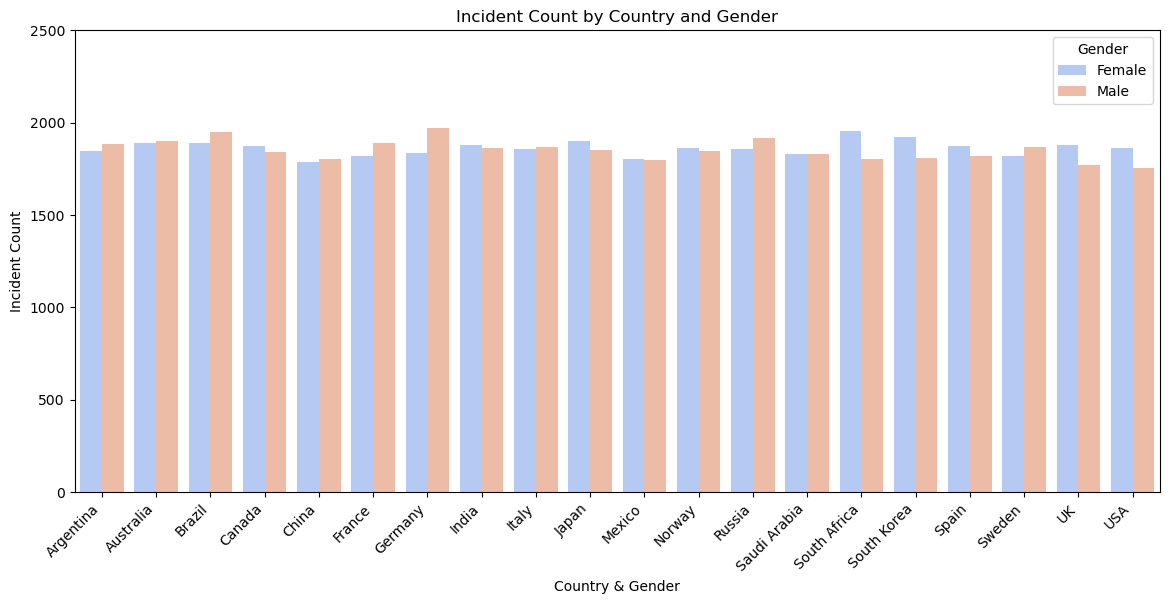

In [60]:
# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x="Country", y="Incident Count", hue="Gender", data=grouped_by_gender_df, palette="coolwarm")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set Y-axis limit to 2500 incident counts
plt.ylim(0, 2500)

# Add labels and title
plt.xlabel("Country & Gender")
plt.ylabel("Incident Count")
plt.title("Incident Count by Country and Gender")
plt.legend(title="Gender")

# Show the plot
plt.show()

In [65]:
# Calculate average incidents count for men
avg_incident_count_male = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Male"]["Incident Count"].mean()
avg_incident_count_male

1851.7

In [66]:
# Calculate average incidents count for women
avg_incident_count_female = grouped_by_gender_df[grouped_by_gender_df["Gender"] == "Female"]["Incident Count"].mean()
avg_incident_count_female

1862.45

In [67]:
# Calculate average incidents count for countries
avg_incident_count = grouped_summary_df["Incident Count"].mean()
avg_incident_count


3714.15